In [3]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("D:\\MACHINE LEARNING\\Machine Learning\\CSV FILE\\Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df.rename(columns={"Gender":'gender','Age':'age','Annual Income (k$)':'income',"Spending Score (1-100)":'score'},inplace=True)
df

,CustomerID,gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
# see missing value
df.isnull().values.any()

False

In [7]:
df.isnull().sum()

CustomerID    0
gender        0
age           0
income        0
score         0
dtype: int64

In [8]:
df.describe()


,CustomerID,age,income,score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


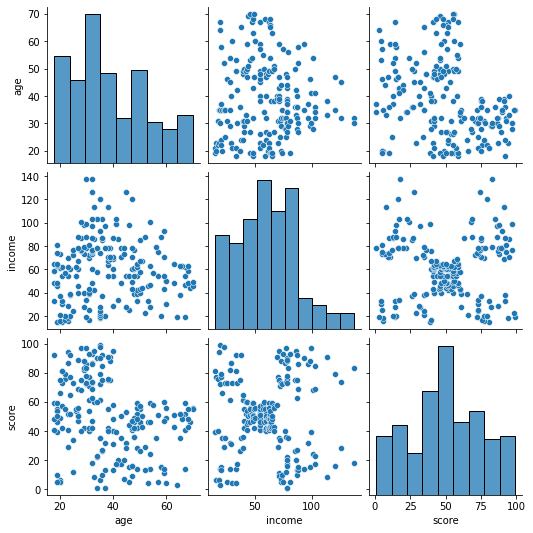

In [9]:
sb.pairplot(df[['age','income','score']])

In [10]:

kmeans_obj = KMeans(n_clusters=5)

In [11]:
# for income and score
kmeans_obj.fit(df[['income','score']])

KMeans(n_clusters=5)

In [12]:
kmeans_obj.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

In [13]:
df['income_clusters'] = kmeans_obj.labels_

In [14]:
df

,CustomerID,gender,age,income,score,income_clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,1
197,198,Male,32,126,74,2
198,199,Male,32,137,18,1


In [15]:
df['income_clusters'].value_counts()

0    81
2    39
1    35
4    23
3    22
Name: income_clusters, dtype: int64

<AxesSubplot:xlabel='score', ylabel='income'>

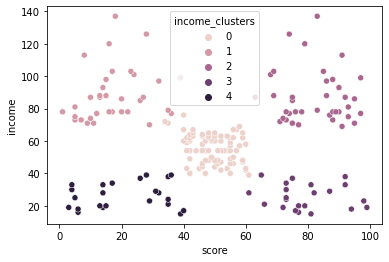

In [16]:
sb.scatterplot(x='score',y='income',hue='income_clusters',data=df)

In [17]:
kmeans_obj2 = KMeans(n_clusters=2)

In [18]:
kmeans_obj2.fit(df[['age','score']])

KMeans(n_clusters=2)

In [19]:
kmeans_obj2.cluster_centers_

array([[28.95294118, 73.62352941],
       [46.16521739, 32.88695652]])

In [20]:
df['age_clusters'] = kmeans_obj2.labels_

In [21]:
df

,CustomerID,gender,age,income,score,income_clusters,age_clusters
0,1,Male,19,15,39,4,1
1,2,Male,21,15,81,3,0
2,3,Female,20,16,6,4,1
3,4,Female,23,16,77,3,0
4,5,Female,31,17,40,4,1
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,0
196,197,Female,45,126,28,1,1
197,198,Male,32,126,74,2,0
198,199,Male,32,137,18,1,1


In [22]:

df['age_clusters'].value_counts()

1    115
0     85
Name: age_clusters, dtype: int64

<AxesSubplot:xlabel='age', ylabel='score'>

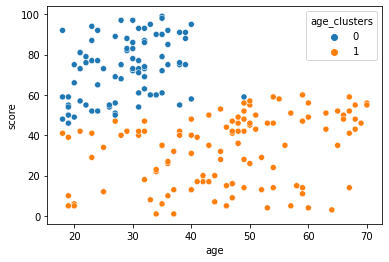

In [23]:
sb.scatterplot(x='age',y='score',hue='age_clusters',data=df)

In [24]:
# applied Elbow method
k_range = range(1,12)
wcss = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['income','score']])
    wcss.append(km.inertia_)
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37233.81451071002,
 30241.34361793659,
 25007.38394731206,
 21830.04197804944,
 19746.91195766089,
 17709.456731274913]

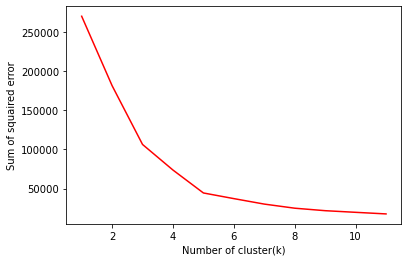

In [25]:
plt.plot(k_range,wcss,color="red")
plt.xlabel("Number of cluster(k)")
plt.ylabel("Sum of squaired error")
plt.show()